# Завантаження бібліотек

In [1]:
!git clone https://github.com/MAZiqing/FEDformer.git
%cd FEDformer


Cloning into 'FEDformer'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 194 (delta 60), reused 43 (delta 43), pack-reused 112 (from 1)
Receiving objects: 100% (194/194), 74.40 KiB | 4.38 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/FEDformer


In [2]:
!pip install einops pandas scikit-image scikit-learn scipy statsmodels sympy matplotlib yfinance pywavelets


In [3]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00


In [4]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.5 MB/s eta 0:00:00


# Аналіз даних

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/BTC-USD.csv')
df.rename(columns={'Date': 'date'}, inplace=True)

df.to_csv('/content/BTC-USD.csv', index=False)

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1953 non-null   object 
 1   Open       1953 non-null   float64
 2   High       1953 non-null   float64
 3   Low        1953 non-null   float64
 4   Close      1953 non-null   float64
 5   Adj Close  1953 non-null   float64
 6   Volume     1953 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 106.9+ KB
None
         date         Open         High          Low        Close  \
0  2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020   
1  2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424   
2  2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211   
3  2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529   
4  2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580   

     Adj Close      Volume  
0  3843.520020  43242

Перші 5 рядків:
         date         Open         High          Low        Close  \
0  2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020   
1  2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424   
2  2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211   
3  2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529   
4  2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580   

     Adj Close      Volume  
0  3843.520020  4324200990  
1  3943.409424  5244856836  
2  3836.741211  4530215219  
3  3857.717529  4847965467  
4  3845.194580  5137609824  

Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1953 non-null   object 
 1   Open       1953 non-null   float64
 2   High       1953 non-null   float64
 3   Low        1953 non-null   float64
 4   Close      1953 non

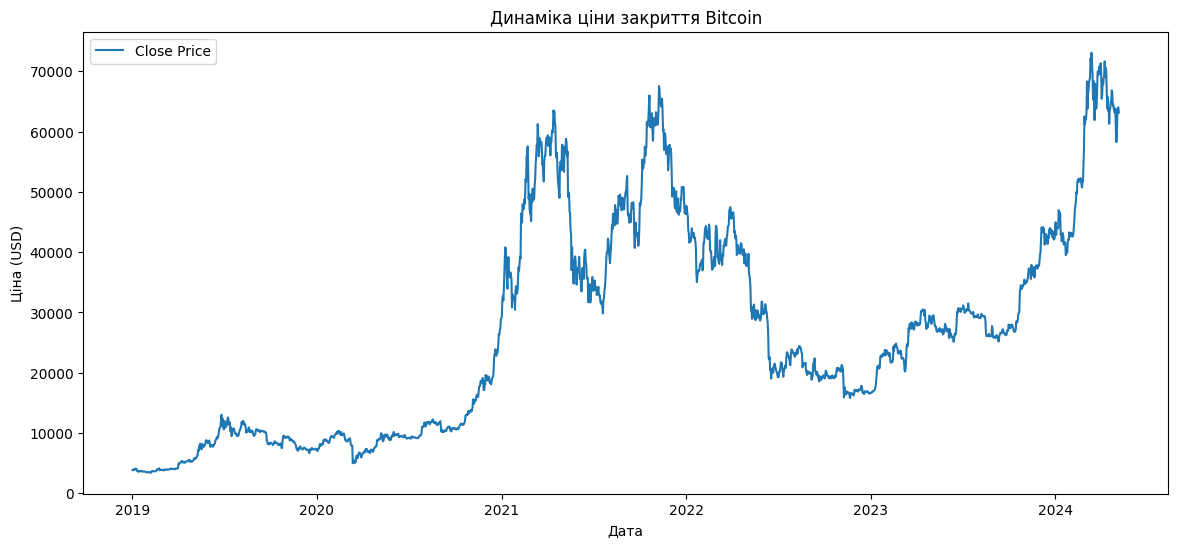

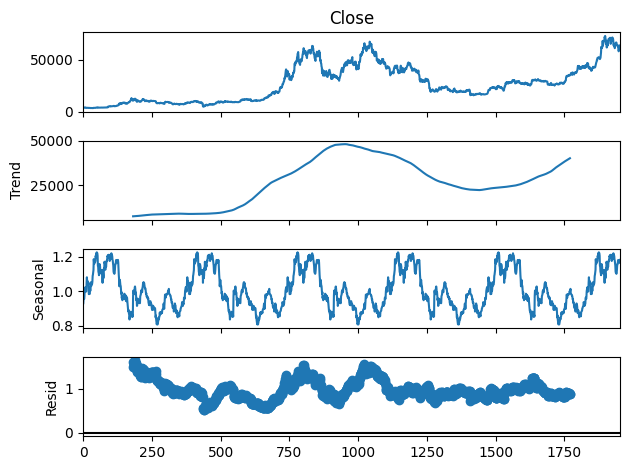

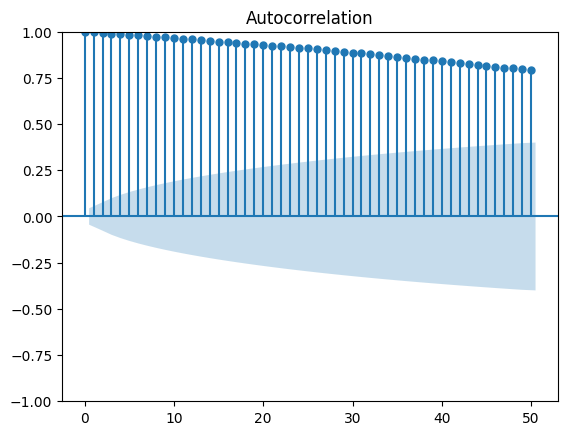

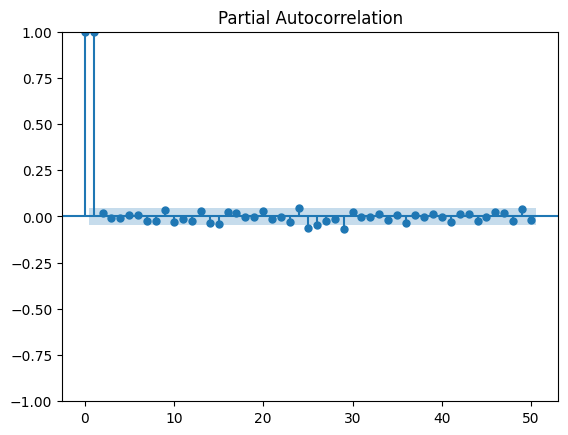

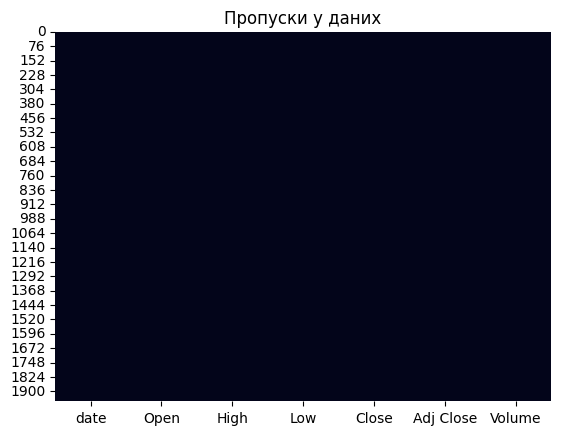

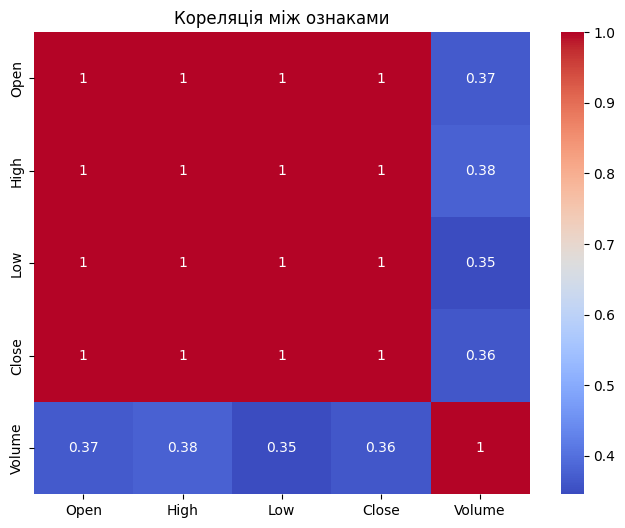

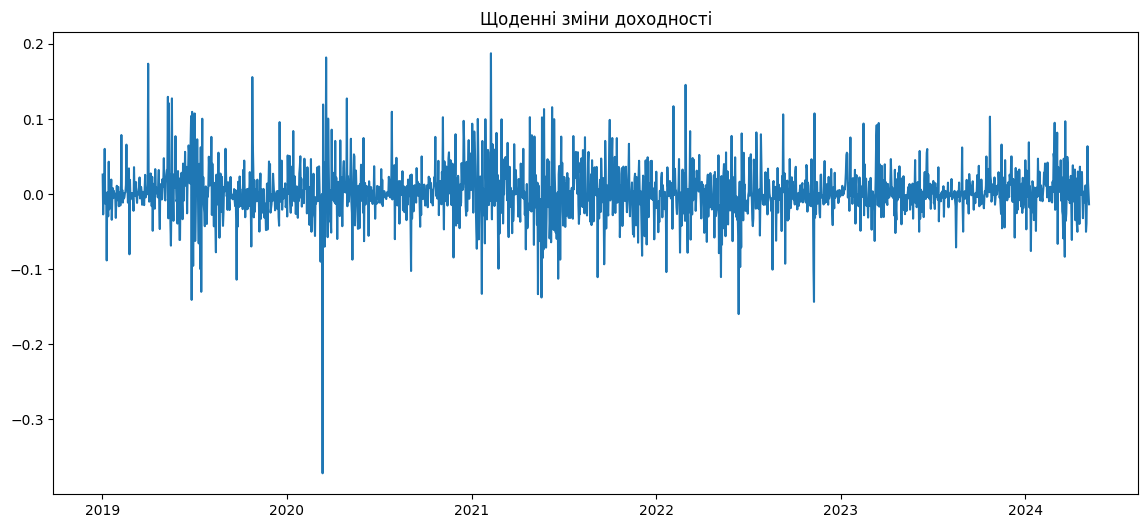

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("Перші 5 рядків:")
print(df.head())
print("\nІнформація про датасет:")
print(df.info())
print("\nСтатистичний опис:")
print(df.describe())

print("\nКількість пропусків у кожній колонці:")
print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

# Візуалізація ціни закриття
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['Close'], label='Close Price')
plt.title("Динаміка ціни закриття Bitcoin")
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()
plt.show()

# Розклад тренду і сезонності
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

# Автокореляція і часткова автокореляція
plot_acf(df['Close'].dropna(), lags=50)
plot_pacf(df['Close'].dropna(), lags=50)
plt.show()

# Візуалізація пропусків
sns.heatmap(df.isnull(), cbar=False)
plt.title('Пропуски у даних')
plt.show()

# Кореляція між ознаками
corr = df[['Open','High','Low','Close','Volume']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Кореляція між ознаками')
plt.show()

# Аналіз добових дохідностей (returns)
df['returns'] = df['Close'].pct_change()
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['returns'])
plt.title("Щоденні зміни доходності")
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

os.makedirs('plots', exist_ok=True)
df['date'] = pd.to_datetime(df['date'])

# Візуалізація ціни закриття
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['Close'], label='Close Price')
plt.title("Динаміка ціни закриття Bitcoin")
plt.xlabel('Дата')
plt.ylabel('Ціна (USD)')
plt.legend()
plt.savefig('plots/close_price.png')
plt.close()

# Розклад тренду і сезонності
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = result.plot()
fig.set_size_inches(14, 10)
fig.savefig('plots/seasonal_decompose.png')
plt.close(fig)

# Автокореляція
fig, ax = plt.subplots(2,1, figsize=(14,10))
plot_acf(df['Close'].dropna(), lags=50, ax=ax[0])
plot_pacf(df['Close'].dropna(), lags=50, ax=ax[1])
fig.savefig('plots/acf_pacf.png')


plt.close(fig)

# Візуалізація пропусків
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.savefig('plots/missing_data.png')
plt.close()

# Кореляція
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap='coolwarm')
plt.savefig('plots/correlation.png')

plt.close()

# Добові дохідності
df['returns'] = df['Close'].pct_change()
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['returns'])
plt.title("Щоденні зміни дохідності")
plt.savefig('plots/daily_returns.png')
plt.close()

print("Візуалізації збережено в папці 'plots/'")



Візуалізації збережено в папці 'plots/'


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Crypto Data Profiling Report")
profile.to_file("crypto_data_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 91.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Запуск Optuna

In [24]:
!python optuna_fedformer.py


[I 2025-11-29 13:50:38,128] A new study created in memory with name: no-name-e5d297ec-4602-4cdf-94f6-eda9856f4546
/content/FEDformer/optuna_fedformer.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
/content/FEDformer/optuna_fedformer.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform("dropout", 0.05, 0.2)

🚀 Running trial with params: ['python', 'run_custom.py', '--is_training', '1', '--task_id', 'BTC', '--model', 'FEDformer', '--version', 'Fourier', '--mode_select', 'random', '--data', 'custom', '--root_path', '/content/', '--data_path', 'BTC-USD.csv', '--features', 'M', '--target', 'Close'

# Тренування з найкращими параметрами

In [25]:
import json
import subprocess

with open("/content/FEDformer/results/best_params.json", "r") as f:
    best_params = json.load(f)

print("Loaded best params:")
print(best_params)

cmd = f"""
python run_custom.py \
--is_training 1 \
--task_id BTC \
--model FEDformer \
--version Fourier \
--mode_select random \
--modes {best_params['modes']} \
--seq_len {best_params['seq_len']} \
--label_len {best_params['label_len']} \
--pred_len {best_params['pred_len']} \
--batch_size {best_params['batch_size']} \
--train_epochs {100} \
--d_model {best_params['d_model']} \
--learning_rate {best_params['learning_rate']} \
--dropout {best_params['dropout']} \
--use_gpu True \
--data custom \
--root_path /content/ \
--data_path BTC-USD.csv \
--features M \
--target Close \
--freq d \
--do_predict

"""

print("\n🚀 Running training command:")
print(cmd)

result = subprocess.run(cmd, shell=True, text=True, capture_output=True)

print("\n📌 OUTPUT:")
print(result.stdout)

print("\n⚠️ ERRORS (if any):")
print(result.stderr)


Loaded best params:
{'seq_len': 96, 'label_len': 48, 'pred_len': 48, 'modes': 64, 'd_model': 512, 'batch_size': 8, 'learning_rate': 0.0008357337043894638, 'dropout': 0.1747329862363196}

🚀 Running training command:

python run_custom.py --is_training 1 --task_id BTC --model FEDformer --version Fourier --mode_select random --modes 64 --seq_len 96 --label_len 48 --pred_len 48 --batch_size 8 --train_epochs 100 --d_model 512 --learning_rate 0.0008357337043894638 --dropout 0.1747329862363196 --use_gpu True --data custom --root_path /content/ --data_path BTC-USD.csv --features M --target Close --freq d --do_predict



📌 OUTPUT:

Args in experiment:
Namespace(is_training=1, task_id='BTC', model='FEDformer', version='Fourier', mode_select='random', modes=64, L=3, base='legendre', cross_activation='tanh', data='custom', root_path='/content/', data_path='BTC-USD.csv', features='M', target='Close', freq='d', detail_freq='d', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=48, enc

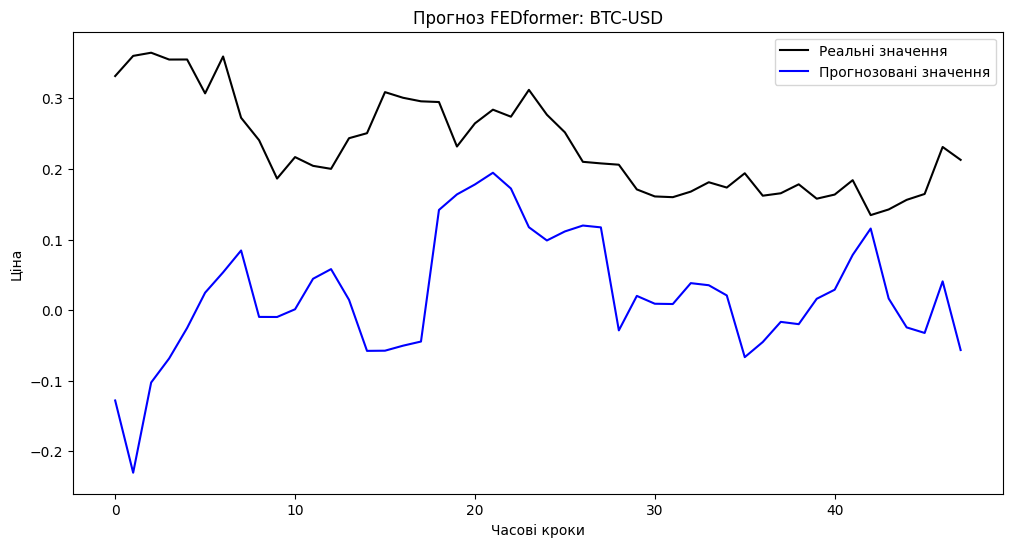

In [30]:
import numpy as np
import matplotlib.pyplot as plt

true_ = np.load("/content/FEDformer/results/BTC_FEDformer_random_modes64_custom_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_exp_0/true.npy")
pred_ = np.load("/content/FEDformer/results/BTC_FEDformer_random_modes64_custom_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_exp_0/pred.npy")


plt.figure(figsize=(12,6))
plt.plot(true[0,:,0], label='Реальні значення', color='black')
plt.plot(pred[0,:,0], label='Прогнозовані значення', color='blue')
plt.title("Прогноз FEDformer: BTC-USD")
plt.xlabel("Часові кроки")
plt.ylabel("Ціна")
plt.legend()
plt.show()




In [28]:
from FEDformer.utils.metrics import metric

mae, mse, rmse, mape, mspe = metric(pred, true)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)



MAE: 0.35968393
MSE: 0.26889744
RMSE: 0.5185532
MAPE: 0.6747932


In [1]:
!zip -r fedformer_model.zip FEDformer


  adding: FEDformer/ (stored 0%)
  adding: FEDformer/exp/ (stored 0%)
  adding: FEDformer/exp/exp_main.py (deflated 82%)
  adding: FEDformer/exp/exp_basic.py (deflated 62%)
  adding: FEDformer/utils/ (stored 0%)
  adding: FEDformer/utils/timefeatures.py (deflated 74%)
  adding: FEDformer/utils/metrics.py (deflated 70%)
  adding: FEDformer/utils/masking.py (deflated 69%)
  adding: FEDformer/utils/tools.py (deflated 64%)
  adding: FEDformer/optuna_fedformer.py (deflated 57%)
  adding: FEDformer/run_custom.py (deflated 75%)
  adding: FEDformer/data_provider/ (stored 0%)
  adding: FEDformer/data_provider/data_factory.py (deflated 66%)
  adding: FEDformer/data_provider/data_loader.py (deflated 89%)
  adding: FEDformer/.git/ (stored 0%)
  adding: FEDformer/.git/hooks/ (stored 0%)
  adding: FEDformer/.git/hooks/pre-merge-commit.sample (deflated 39%)
  adding: FEDformer/.git/hooks/fsmonitor-watchman.sample (deflated 62%)
  adding: FEDformer/.git/hooks/pre-commit.sample (deflated 45%)
  adding: